# Hardy's Paradox


Hardy's Paradox nicely illustrates the fundamental difference of Quantum Mechanics and classical physics. In particular, it can be used to discuss the claim made by Einstein, Podolsky and Rosen ("EPR") back in 1935. They objected to the uncertainty seen in quantum mechanics, and thought it meant that the theory was incomplete. They thought that a qubit should always know what output it would give for both kinds of measurement, and that it only seems random because some information is hidden from us. As Einstein said: God does not play dice with the universe. 

The idea and part of the source code for this tutorial was published in a previous version of the [Qiskit Textbook](https://qiskit.org/textbook/), in the (now removed) chapter [The Unique Properties of Qubits](https://github.com/Qiskit/qiskit-textbook/blob/master/content/ch-states/old-unique-properties-qubits.ipynb).

This variant of Hardy's Paradox is a relatively simple example for an entangled qubit state that could not be reproduced by a few classical bits and a random number generator. It shows that quantum variables aren't just classical variables with some randomness bundled in.

(hit space or right arrow to move to next slide)

## Usage instructions for the user interface

1. "Ctrl -" and "Ctrl +" (or "command -", "command +") adjust the zoom level to fit the text to the browser window
* Use "space" and "shift  space" to navigate through the slides 
* "Shift Enter" executes the interactive cells (might need to click the cell, first)
* Execute the interactive cells on each slide ("In [1]:", etc)
* In case a cell is not formatted correctly, try to double-click and then "Shift Enter" to re-execute
* Interactive cells can be modified, if needed
* "X" at the top left exits the slideshow and enters the jupyter notebook interface

## Manufacturing Cars

Let's assume we build cars.
The cars have a color (red or blue) and an engine type (gasoline or diesel).

The director of the production plant ensures us that the following is always true for the first two cars that leave the plant each morning:

1. If we look at the colors of both cars, it never happens that both are red.
2. If we measure one engine type of one car to be diesel, then the other car has to be red.

Let's encode the two cars with two qubits and the colors by a measurement in the (standard) Z Basis, where 0 relates to red and 1 relates to blue. The engine type is encoded by a measurement in the X Basis, where 0 relates to gasoline and 1 relates to diesel.

Or in short: <br>
Z color: <span style="color:red">0 red</span>, <span style="color:blue">1 blue</span> <br>
X engine type: 0 gasoline, 1: diesel

We now initialize the quantum circuit and create a specific state of the two qubits.

We will show that this state satisfies the two conditions mentioned before. 

We will then analyze the question if both cars can be diesel.

In [10]:
#This should be removed after update
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [11]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
import math

### Circuit creation

In the following, a specific entangled state of the two qubits will be created.

At first, a quantum register and circuit with two qubits is created.

In [12]:
# hit "shift + Enter" to execute this cell
q = QuantumRegister(2) # create a quantum register with two qubits
# create a classical register that will hold the results of the measurement
c = ClassicalRegister(2) 
qc_hardy = QuantumCircuit(q, c)

The existing default $ |00\rangle $ state is now modified with the gates down below. Don't worry, you probably don't understand what happens and why these operations are performed, but we will dive in deep with the related maths and explain everything in detail.
First, try to understand each gate and the whole circuit on your own.

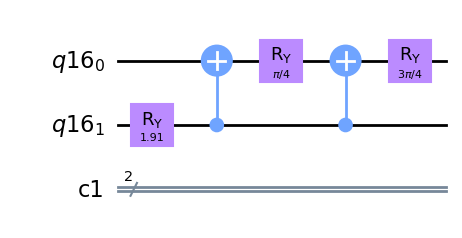

In [13]:
#STEP 1
qc_hardy.ry(1.911,q[1])
#STEP 2
qc_hardy.cx(q[1],q[0])
#STEP 3
qc_hardy.ry((1/4)*math.pi,q[0])
qc_hardy.cx(q[1],q[0])
qc_hardy.ry((3/4)*math.pi,q[0])

qc_hardy.draw(output='mpl')

#### Step 1: The RY-Gate $ RY(\theta)$

At first, the second qubit $q_1$ is rotated around the Y-Axis by a specific value $ \theta $, in this case $ \theta = 1.91$.
<i> (Reminder: A rotation by $ \theta = \pi$ equals the Y-Gate.) </i>

Mathematically the RY-Gate is given by:

<p> $ RY\left(\theta\right) = exp\left(-i\frac{\theta}{2}Y\right) =
\begin{pmatrix}
cos\left(\frac{\theta}{2}\right) & -sin\left(\frac{\theta}{2}\right)\\
sin\left(\frac{\theta}{2}\right) & cos\left(\frac{\theta}{2}\right)
\end{pmatrix} $  </p>

The matrix representation for this case is therefore given by:

<p> $ RY\left(1.91\right)  \cdot |0\rangle =
exp\left(-i\frac{1.91}{2}Y\right) \cdot |0\rangle =
\begin{pmatrix}
cos\left(\frac{1.91}{2}\right) & -sin\left(\frac{1.91}{2}\right)\\
sin\left(\frac{1.91}{2}\right) & cos\left(\frac{1.91}{2}\right)
\end{pmatrix} \cdot \begin{pmatrix} 1 \\ 0 \end{pmatrix}=
\begin{pmatrix}  cos\left(\frac{1.91}{2}\right) \\ sin\left(\frac{1.91}{2}\right) \end{pmatrix} \approx
\begin{pmatrix}  0.578 \\ 0.816 \end{pmatrix} \approx
\begin{pmatrix}  \sqrt{\frac{1}{3}} \\ \sqrt{\frac{2}{3}} \end{pmatrix}
$  </p>

So now Z-measurements (also the standard measurement axis) of the second qubit $q_1$ should approximately result in 1 $ \frac{2}{3} $ and in 0 $ \frac{1}{3} $ of the time.

#### Step 2: Creating an entangled state

Now both qubits enter an entanglement which means that they cannot be described or measured independently of each other. They are now <b>one system</b>.
This is done by using the CNOT-Gate on the first qubit $q_0$ with $q_1$ as control-gate.
<i> Reminder: The CNOT-Gate $CX$ can be described as a conditional X-Gate. Only if the control-qubit is 1, the X-Gate is performed on the target-qubit. But rather than trying to understand everything via this explanation, try to focus on the maths and everything will make more sense. </i>

The property that every following action is now performed on one and only one system (which contains two entangled qubits) is much more visible when we have a look at the matrix representation of the CNOT-Gate:

<p> $ CX = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix} $ </p>

(But careful: The CNOT-Gate differs according to the chosen control qubit!)
Obviously, this matrix cannot be multiplied with the vector from above because the dimensions do not match. Because of this we have to create the state-vector which combines both qubits. We achieve this by using the tensor-product:

<p> $
\begin{pmatrix}  cos\left(\frac{1.91}{2}\right) \\ sin\left(\frac{1.91}{2}\right) \end{pmatrix} \otimes
\begin{pmatrix}  1 \\ 0 \end{pmatrix} =
\begin{pmatrix}  cos\left(\frac{1.91}{2}\right) \\ 0 \\ sin\left(\frac{1.91}{2}\right) \\ 0 \end{pmatrix}
 $ </p>

Now we can use this to mathematically illustrate our circuit.

<p> $ \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix} \cdot
\begin{pmatrix}  cos\left(\frac{1.91}{2}\right) \\ 0 \\ sin\left(\frac{1.91}{2}\right) \\ 0 \end{pmatrix} =
\begin{pmatrix}  cos\left(\frac{1.91}{2}\right) \\ 0 \\ 0 \\ sin\left(\frac{1.91}{2}\right) \end{pmatrix} \approx
\begin{pmatrix}  0.578 \\ 0 \\ 0 \\ 0.816 \end{pmatrix} \approx
\begin{pmatrix}  \sqrt{\frac{1}{3}} \\ 0 \\ 0 \\ \sqrt{\frac{2}{3}} \end{pmatrix}
$ </p>

As always you can now conclude the probabilities from the vector by looking at the radicands. By now there is no obvious connection to the two properties. <p> <i> (Reminder: This should be read as  $\begin{pmatrix}  "00" \\ "10" \\ "01" \\ "11" \end{pmatrix}$) </i> </p>

As we see now, it is not intuitive how to extract the single vectors of both qubits from this entangled state-vector or whether this is even possible. And that's the clue: Because they are now one system this is not possible (except for specific corner cases). Therefore, we are now left with a vector which describes the system of both interdependent qubits.

#### Step 3: Excluding the 00-state

The first property requires our quantum circuit to exclude the 00-state (aka RED/RED) or in other words: The probability of measuring 00 int the Z-axis has to be 0.
For this we use two RY-Gates and one CNOT. To explain what happens, let us first have a look on the $\theta$-Values of the RY-Gates:

<p> $ RY_0\left(\theta_0\right) = RY_0\left(\frac{\pi}{4}\right)$ </p>
<p> $ RY_1\left(\theta_1\right) = RY_1\left(\frac{3\pi}{4}\right)$ </p>
<p> $ \theta_0 + \theta_1 = \frac{\pi}{4}+\frac{3\pi}{4} = \pi$ </p>

This means that both rotations together are equivalent to a Y-Gate. So which role do the CNOT-Gates play?
To understand the effect of this, let us make a case distinction:

1. In approximately $\frac{1}{3}$ of the time, a measurement after step 2 would result in 00.
In this case, <b>none</b> of the conditions of the CNOT-Gates (the ones from step 2 and step 3) are met and therefore no Operation on the $q_0$ Qubit is performed (except for the RY-Gates). So all step 3 does is transferring the $\frac{1}{3}$ probability to the "01"-state.
2. In approximately $\frac{2}{3}$ of the time, a measurement after step 2 would result in "11".
In this case, <b>both</b> of the condition of the CNOT-Gates are met and therefore both times the X-Gate is performed on the $q_0$ Qubit. The outcome of this will be visible after the calculations.

Again, I want to stress something here: It should be clear that the CNOT-Gate is not doing "nothing" when its condition isn't met. We are still looking at an entangled system and there is one 4×1-vector describing the system. There are no two different calculations for each case above. Its one vector and one calculation (as you will see below) and every vector entry describes the probability for one specific case. This is also sometimes referred to as the property of quantum states to have <b>multiple bit states encoded at once</b>.

Obviously the dimensions of the RY-Gate do not match with our entangled system. There we have to expand it by tensor multiplication with the I-Gate (Identity Gate) which essentially causes that we only use the gate on one qubit.
<p> $
RY_0: \theta_0 = \frac{\pi}{4}\\
\left( I \otimes RY\left(\frac{\pi}{8}\right) \right) \cdot  \begin{pmatrix}  cos\left(\frac{1.91}{2}\right) \\ 0 \\ 0 \\ sin\left(\frac{1.91}{2}\right) \end{pmatrix} =
\left(
\begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}
\otimes
\begin{pmatrix} cos\left(\frac{\pi}{8}\right) & -sin\left(\frac{\pi}{8}\right)\\
sin\left(\frac{\pi}{8}\right) & cos\left(\frac{\pi}{8}\right) \end{pmatrix} \right)
\cdot
\begin{pmatrix}  cos\left(\frac{1.91}{2}\right) \\ 0 \\ 0 \\ sin\left(\frac{1.91}{2}\right) \end{pmatrix} \\=
\begin{pmatrix}
cos\left(\frac{\pi}{8}\right) & -sin\left(\frac{\pi}{8}\right) & 0 & 0 \\
sin\left(\frac{\pi}{8}\right) & cos\left(\frac{\pi}{8}\right) & 0 & 0 \\
0 & 0 & cos\left(\frac{\pi}{8}\right) & -sin\left(\frac{\pi}{8}\right) \\
0 & 0 & sin\left(\frac{\pi}{8}\right) & cos\left(\frac{\pi}{8}\right)
\end{pmatrix}
\cdot
\begin{pmatrix}  cos\left(\frac{1.91}{2}\right) \\ 0 \\ 0 \\ sin\left(\frac{1.91}{2}\right) \end{pmatrix} \approx
\begin{pmatrix}  0.534 \\ 0.221 \\ -0.312 \\ 0.754 \end{pmatrix} \approx
\begin{pmatrix}  \sqrt{0.285} \\ \sqrt{0.049} \\ \sqrt{0.097} \\ \sqrt{0.569} \end{pmatrix}
$ </p>

The following calculations will be done on the rounded numbers to reduce complexity.
Now the CNOT-Gate is added.

<p> $
CX\\
CX \cdot  \begin{pmatrix}  0.534 \\ 0.221 \\ -0.312 \\ 0.754 \end{pmatrix} =
\begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix}
\cdot
\begin{pmatrix}  0.534 \\ 0.221 \\ -0.312 \\ 0.754 \end{pmatrix} =
\begin{pmatrix}  0.534 \\ 0.221 \\ 0.754 \\ -0.312 \end{pmatrix} \approx
\begin{pmatrix}  \sqrt{0.285} \\ \sqrt{0.049} \\ \sqrt{0.569} \\ \sqrt{0.097}  \end{pmatrix}
$ </p>

At last, we add the RY-Gate.

<p> $
RY_1: \theta_1 = \frac{3\pi}{4}\\
\left( I \otimes RY\left(\frac{3\pi}{8}\right) \right) \cdot  \begin{pmatrix}  0.534 \\ 0.221 \\ 0.754 \\ -0.312 \end{pmatrix} =
\begin{pmatrix}
cos\left(\frac{3\pi}{8}\right) & -sin\left(\frac{3\pi}{8}\right) & 0 & 0 \\
sin\left(\frac{3\pi}{8}\right) & cos\left(\frac{3\pi}{8}\right) & 0 & 0 \\
0 & 0 & cos\left(\frac{3\pi}{8}\right) & -sin\left(\frac{3\pi}{8}\right) \\
0 & 0 & sin\left(\frac{3\pi}{8}\right) & cos\left(\frac{3\pi}{8}\right)
\end{pmatrix}
\cdot
\begin{pmatrix}  0.534 \\ 0.221 \\ 0.754 \\ -0.312 \end{pmatrix} \approx
\begin{pmatrix}  0 \\ 0.577 \\ 0.577 \\ 0.577 \end{pmatrix} \approx
\begin{pmatrix}  0 \\ \sqrt{0.333} \\ \sqrt{0.333} \\ \sqrt{0.333} \end{pmatrix}
$ </p>

As we see now, we have nullified the probability of 00. Therefore, our first property is encoded.

### Circuit interpretation

Let's see what happens if we look at the color of both cars, i.e. if we make an Z measurement on each of the qubits. <br>
A result of 00 would indicate that both cars are red, which is not allowed by property #1.

Results for two z (=color) measurements:


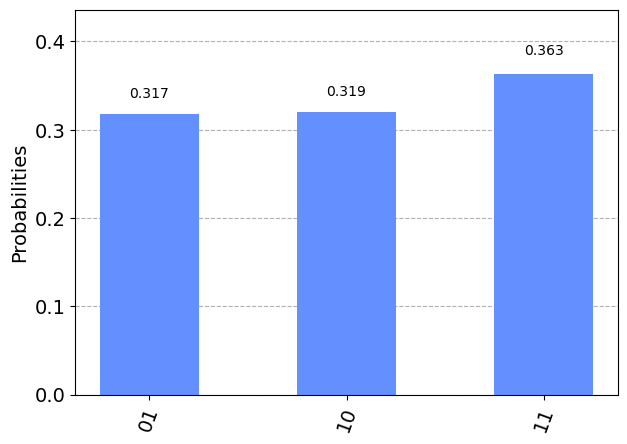

In [14]:
measurements = QuantumCircuit(q,c)
# z measurement on both qubits
measurements.measure(q[0],c[0])
measurements.measure(q[1],c[1])
qc = qc_hardy + measurements
print('Results for two z (=color) measurements:')
plot_histogram(execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts())

The count of "00" is zero, and so these qubits do indeed satisfy property #1.

Next, let's see the results of an x (engine type) measurement of one and a z (color) measurement of the other.<br>
A result of 11 would indicate that car 1 is a diesel and car two is blue, which is not allowed by property #2.

Results for an x (engine type) measurement on qubit 0 and a z (color) measurement on qubit 1:


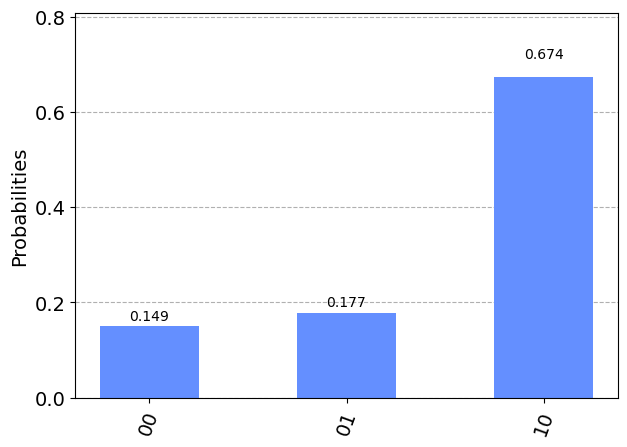

In [15]:
measurements = QuantumCircuit(q,c)
# x measurement on qubit 0
measurements.h(q[0])
measurements.measure(q[0],c[0])
# z measurement on qubit 1
measurements.measure(q[1],c[1])
qc = qc_hardy + measurements
print('Results for an x (engine type) measurement on qubit 0 and a z (color) measurement on qubit 1:')
plot_histogram(execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts())

The count of "11" is zero.

Let's prove this mathematically:

Again, we have to use the I-Gate to increase the dimensions of the H-Gate.
<p> $
\left( H \otimes I \right) \cdot
\begin{pmatrix}  0 \\ 0.577 \\ 0.577 \\ 0.577 \end{pmatrix} \equals
\left( \frac{1}{\sqrt{2}} \begin{pmatrix}  1 & 1 \\ 1 & -1 \end{pmatrix} \otimes \begin{pmatrix}  1 & 0 \\ 0 & 1 \end{pmatrix} \right) \cdot
\begin{pmatrix}  0 \\ 0.577 \\ 0.577 \\ 0.577 \end{pmatrix} \equals
\frac{1}{\sqrt{2}} \begin{pmatrix}  1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1 \end{pmatrix} \cdot
\begin{pmatrix}  0 \\ 0.577 \\ 0.577 \\ 0.577 \end{pmatrix} \equals \\
\frac{1}{\sqrt{2}} \begin{pmatrix}  0.577 \\ 1.154 \\ -0.577 \\ 0 \end{pmatrix} \approx
\begin{pmatrix}  0.408 \\ 0.816 \\ -0.408 \\ 0 \end{pmatrix} \approx
\begin{pmatrix}  \sqrt{0.166} \\ \sqrt{0.666} \\ \sqrt{0.166} \\ 0 \end{pmatrix}
$ </p>

If we also show that the same is true if we measure the other way round (), we have shown that the cars (qubits) satisfy property #2.

Results for an z (color) measurement on qubit 0 and a x (engine type) measurement on qubit 1:


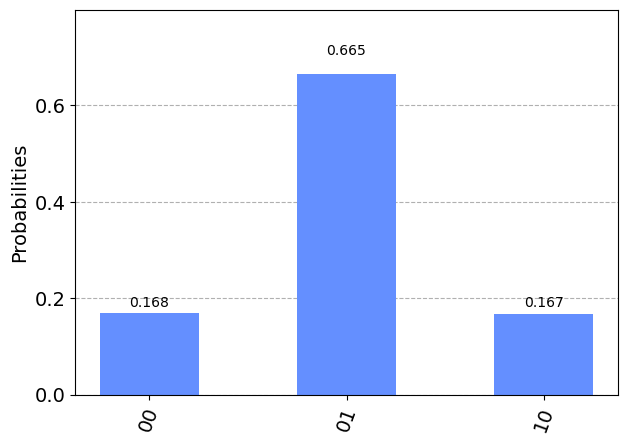

In [16]:
measurements = QuantumCircuit(q,c)
# z measurement on qubit 0
measurements.measure(q[0],c[0])
# x measurement on qubit 1
measurements.h(q[1])
measurements.measure(q[1],c[1])
qc = qc_hardy + measurements
print('Results for an z (color) measurement on qubit 0 and a x (engine type) measurement on qubit 1:')
plot_histogram(execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts())

As result "11" never occurs, property #2 also holds true. We will assume that the calculations are also correct as seen previously.
Which gates exactly lead to property #2 being fulfilled is a question which can only be answered by complex procedures and is therefore not mentioned here.

What can we now infer (classically) about the engine types of both cars?

Let's first recall the properties we have confirmed:

1. If we look at the colors of the cars, it never happens that both are red.
2. If the engine type of one car is diesel, then the other car is red.

Let's assume we measure the engine type for both cars and both would be diesel. Then by applying property #2, we can deduce what the result would have been if we had made color measurements instead: We would have gotten an output of red for both. 

However, this result is impossible according to property #1. We can therefore conclude that it must be impossible that both cars are diesel.

But now let's do a measurement of the engine type for both cars, i.e. a measurement in the x basis for both qubits.

Results for two x (engine type) measurement on both qubits:


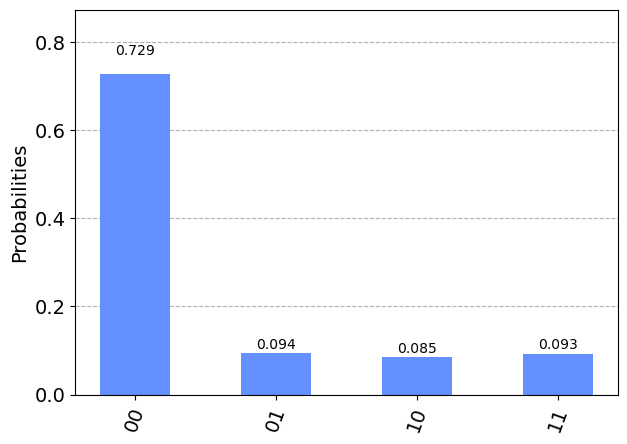

In [17]:
measurements = QuantumCircuit(q,c)
measurements.h(q[0])
measurements.measure(q[0],c[0])
measurements.h(q[1])
measurements.measure(q[1],c[1])
qc = qc_hardy + measurements
print('Results for two x (engine type) measurement on both qubits:')
plot_histogram(execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts())

## Backgound on Hardy's Paradox


In their famous paper in 1935, EPR essentially claimed that qubits can indeed be described by some form of classical variable. They did not know how to do it, but they were sure it could be done. Then quantum mechanics could be replaced by a much nicer and more sensible theory.

It took until 1964 to show that they were wrong. J. S. Bell proved that quantum variables behaved in a way that was fundamentally unique. Since then, many new ways have been found to prove this, and extensive experiments have been done to show that this is exactly the way the universe works. We'll now consider a simple demonstration, using a variant of Hardy’s paradox.

### A thought experiment in quantum mechanics


Originally, Hardy's paradox described a thought experiment by Lucien Hardy in the area of quantum mechanics.

The experiment focuses on a particle and its anti-particle which interact without annihilating each other. The particles interfere with each other by two interferometers which are arranged in a way so that the paths of both particles overlap. The output each particle takes is the object of measurement. Our equivalent to the two particles are the two cars.
As in our example, there is the property that if you measure the output of one particle the measurement of the second particle always results in the same specific result. Parallel to our #2 property, classical logic would imply that a special output case of both particles is impossible which indeed is possible as measurements on both at once show. (Reminder for comparison: We wrongfully concluded from the second property that both cars could not be diesel. The measurements proofed us wrong.)

To learn more about Hardy's paradox in quantum mechanics have a look at <a href="https://en.wikipedia.org/wiki/Hardy%27s_paradox">Wikipedia: Hardy's Paradox</a>.

## What went wrong?

Our mistake was in the following piece of reasoning.

* By applying property 2 we can deduce what the result would have been if we had made z measurements instead.

We used our knowledge of the x (color) outputs to work out what the z (engine type) outputs were. Once we’d done that, we assumed that we were certain about the value of both.

To underline this paradox, let's have a look at the calculations.

H-Gate on $q_0$ and $q_1$:
<p> $
\left( H \otimes H \right) \cdot
\begin{pmatrix}  0 \\ 0.577 \\ 0.577 \\ 0.577 \end{pmatrix} \equals
\left( \frac{1}{\sqrt{2}} \begin{pmatrix}  1 & 1 \\ 1 & -1 \end{pmatrix} \otimes \frac{1}{\sqrt{2}} \begin{pmatrix}  1 & 1 \\ 1 & -1 \end{pmatrix} \right) \cdot
\begin{pmatrix}  0 \\ 0.577 \\ 0.577 \\ 0.577 \end{pmatrix} \equals
\frac{1}{2} \begin{pmatrix}  1 & 1 & 1 & 1 \\ 1 & -1 & 1 & -1 \\ 1 & 1 & -1 & -1 \\ 1 & -1 & -1 & 1 \end{pmatrix} \cdot
\begin{pmatrix}  0 \\ 0.577 \\ 0.577 \\ 0.577 \end{pmatrix} \equals \\
\frac{1}{2} \begin{pmatrix}  1.731 \\ -0.577 \\ -0.577 \\ -0.577 \end{pmatrix} \equals
\begin{pmatrix}  0.8655 \\ -0.2885 \\ -0.2885 \\ -0.2885 \end{pmatrix} \approx
\begin{pmatrix}  \sqrt{0.749} \\ \sqrt{0.083} \\ \sqrt{0.083} \\ \sqrt{0.083} \end{pmatrix}
$ </p>

Our logic would be completely valid if we were not reasoning about quantum objects.
But as D.Mermin concludes at the end of his excellent book <a href="https://library.uoh.edu.iq/admin/ebooks/22831-quantum_computer_science.pdf">"Quantum Computer Science: An Introduction"</a>, for quantum objects you have to accept "what didn't happen didn't happen", i.e. we cannot make an assumptions about a measurement that wasn't done.

The idea that measuring something is a completely neutral action is a common misconception. You always have to keep in mind that in quantum physics the measurement changes the system.

This is (part of) what makes quantum computers able to outperform classical computers. It leads to effects that allow programs made with quantum variables to solve problems in ways that those with normal variables cannot. But just because qubits don’t follow the same logic as normal computers, it does not mean they defy logic entirely. They obey the definite rules laid out by quantum mechanics.

In [18]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.16.0',
 'qiskit-aer': '0.7.0',
 'qiskit-ignis': '0.5.0',
 'qiskit-ibmq-provider': '0.11.0',
 'qiskit-aqua': '0.8.0',
 'qiskit': '0.23.0'}